### K-means clustering - example I

In [1]:
from sklearn.datasets.samples_generator import make_blobs

/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Ex.1 Please analyse the function parameters and generated output.

In [2]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed 

#### Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [3]:
X, y =  make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=.4)

#### Ex.3 Analyse the x and y shape.

In [4]:
X.shape

(120, 2)

In [5]:
y.shape

(120,)

#### Ex.4 Plot the data samples in X to see the clusters.

All sklearn algorithms have a similar way of running:

    initialize the algorithm
    fit the model
    predict the outcome for the data

In [8]:
import matplotlib.pyplot as plt

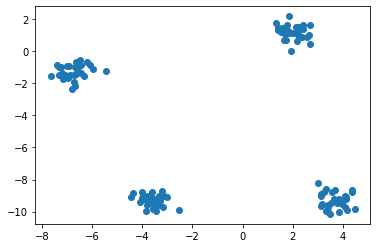

In [19]:
plt.scatter(X[:,0],X[:,1])

#### Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome.

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [17]:
km_pred = kmeans.predict(X)

#### Ex.6 Plot the results in order to see whether the clustering worked.

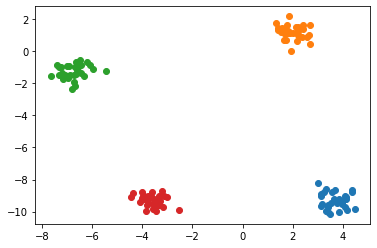

In [24]:
for i in range(4):
    plt.scatter(X[i==km_pred,0],X[i==km_pred,1])


#### Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi.

In [25]:
kmeans.inertia_

43.14728506074058

### K-means clustering - example II

#### Ex.1 Plot the data

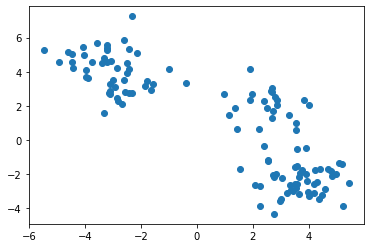

In [37]:
X, y =  make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=.8)

plt.scatter(X[:,0],X[:,1])

#### Ex.2 Predict for the same nb. of clusters = 5.

135.44289149394157

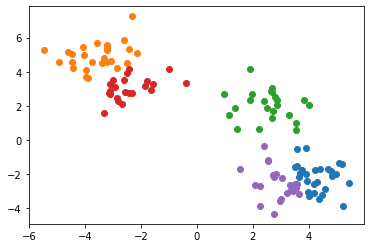

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
km_pred = kmeans.predict(X)
for i in range(5):
    plt.scatter(X[i==km_pred,0],X[i==km_pred,1])

kmeans.inertia_  # Ex. 4

#### Ex.3 Predict for 2 instead of 5 clusters.

534.54608304282

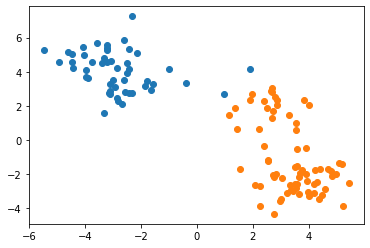

In [40]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
km_pred = kmeans.predict(X)
for i in range(2):
    plt.scatter(X[i==km_pred,0],X[i==km_pred,1])

kmeans.inertia_  # Ex. 4

#### Ex.4 Calculate inertia or Dunn index.

### K-means ++

#### Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:

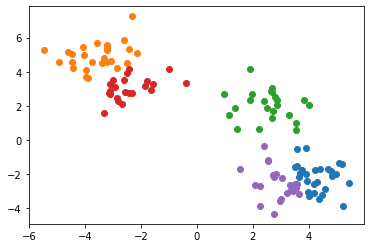

In [41]:
init='k-means++'

kmeans = KMeans(n_clusters=5, random_state=0, init=init).fit(X)
km_pred = kmeans.predict(X)
for i in range(5):
    plt.scatter(X[i==km_pred,0],X[i==km_pred,1])


#### Ex.2 Calculate inertia or Dunn index.

In [43]:
kmeans.inertia_

135.44289149394157

### Elbow method

#### Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

In [47]:
distortion = list()

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    km_pred = kmeans.predict(X)
    distortion.append(kmeans.inertia_)

#### Ex.2 Plot the distortions of K-Means.

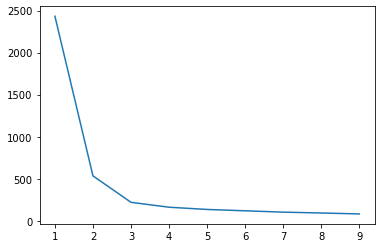

In [49]:
plt.plot(range(1, 10), distortion)

### Ex. Please check whether the K-Means algorithm will correctly cluster the data:

In [50]:
from sklearn.datasets.samples_generator import make_moons
import seaborn as sns
import pandas as pd

In [51]:
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

In [56]:
#Kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_

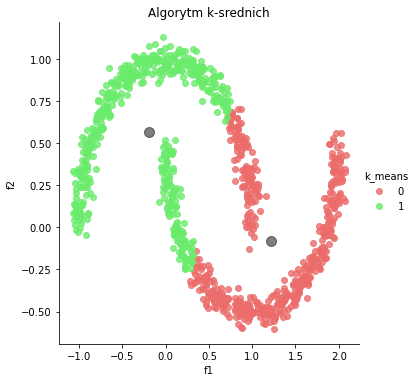

In [57]:
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()
